<a href="https://colab.research.google.com/github/LiTaokui/TensorFlow-Deep-Learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to neural network classification with TensorFlow

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

# create data to view and fit

In [11]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
           noise=0.03,
           random_state=42)

In [12]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [14]:
# check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize it!

In [20]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


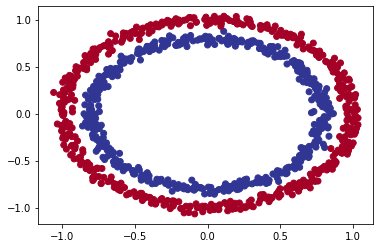

In [21]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# input and output shapes

In [22]:
# check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [23]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [24]:
# check how many samples we are working
len(X), len(y)

(1000, 1000)

In [27]:
# view the first example of features and labels
X[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

### Steps in modelling

1. create a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate...

In [29]:
# import tensorflow
import tensorflow as tf

In [34]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model using the Sequential API
model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

# 3. fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [36]:
# let' s try to improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [43]:
# let's add another layer and train for longer.

# set the random seed
tf.random.set_seed(42)

# 1. create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

# 3. fit the model
model_2.fit(X, y,epochs=100, verbose=0)

In [44]:
# 4. evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

### improve our model

1. create the model
* add more layes
* increase the number of hidden units


2. compile the model
* choose a different optimization function


3. fit a model
* increase more epochs

In [48]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model(this time 3 layers)
model_3 = tf.keras.Sequential([
 tf.keras.layers.Dense(100), # add 100 dense neurons
 tf.keras.layers.Dense(10), # add another layer with 10 neurons
 tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

# 3. fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [49]:
# 4. evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [46]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


To visualize our model, we can:

1. take in trained model, features (X) and labels(y)
2. create a meshgrid of the different X values
3. make a prediction across the meshgrid
4. plot the predictions as well as the line between zones(where each unique class falls)

In [72]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  plots the decision boundary created by a model predicting on X.
  """
  
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
              np.linspace(y_min, y_max, 100)
  )

  # create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
     print("doing binary classification")
     y_pred = np.round(y_pred).reshape(xx.shape)
     
  # plot the decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classification


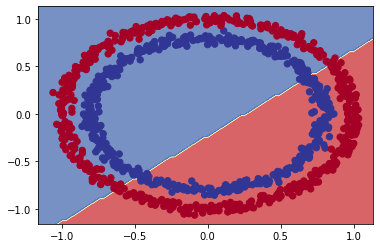

In [73]:
# check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [74]:
# let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [80]:
# spilt our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]



In [82]:
# setup random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model(this time with a regression-specific loss function)
model_3.compile(loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

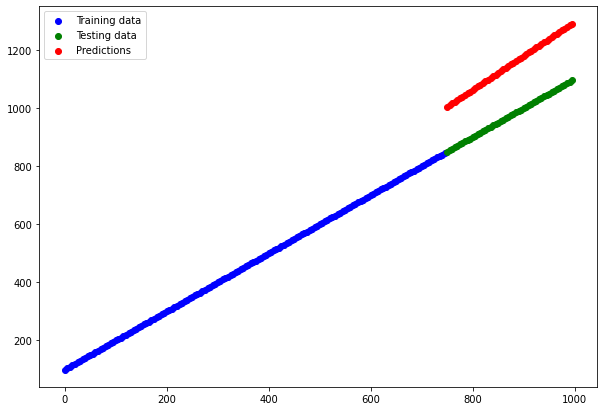

In [89]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();